In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
csv_file = 'robustness_results.csv'
df = pd.read_csv(csv_file)
# Set plot style
sns.set(style="whitegrid")

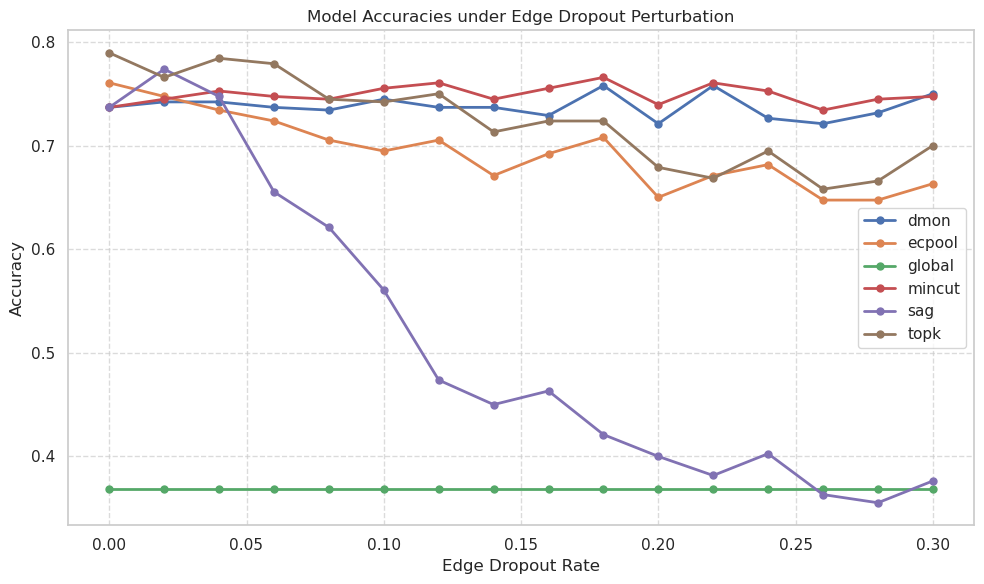

<Figure size 640x480 with 0 Axes>

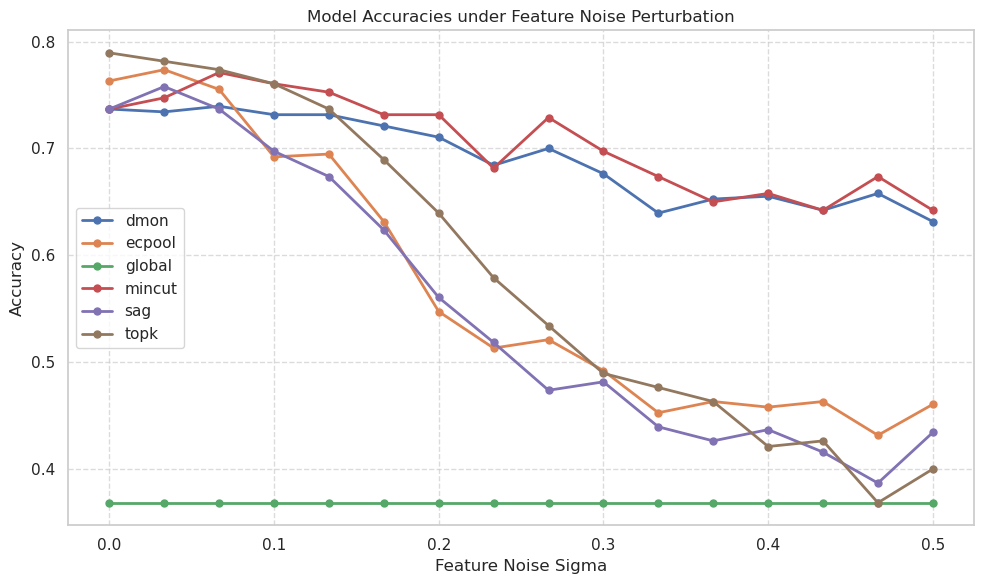

<Figure size 640x480 with 0 Axes>

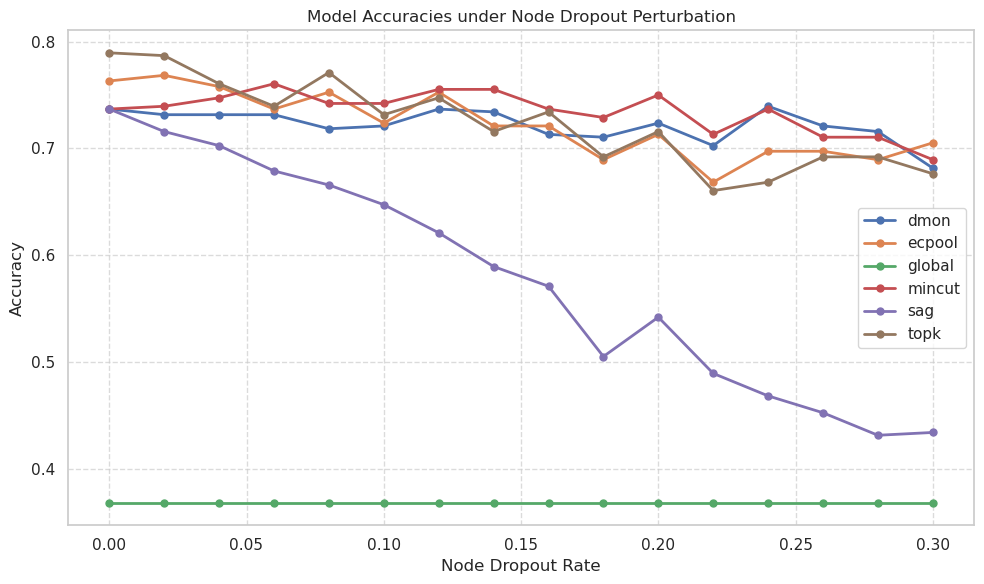

<Figure size 1200x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [4]:
# Create plots for each perturbation type
for perturbation, pert_df in df.groupby('perturbation'):
    plt.figure(figsize=(10, 6))
    for model_name, group in pert_df.groupby('model'):
        plt.errorbar(
            group['level'], 
            group['mean_accuracy'], 
            label=model_name, 
            marker='o',
            capsize=3,
            markersize=5,
            linewidth=2
        )
    # Plot each model in the perturbation group
    # for model_name, group in pert_df.groupby('model'):
        # Plot with error bars using the mean and std values
        # plt.errorbar(
        #     group['level'], 
        #     group['mean_accuracy'], 
        #     yerr=group['std_accuracy'],
        #     label=model_name, 
        #     marker='o',
        #     capsize=3,
        #     markersize=5,
        #     linewidth=2
        # )
    
    # Add plot labels and title
    if perturbation == 'edge_drop':
        plt.xlabel('Edge Dropout Rate')
        plt.title('Model Accuracies under Edge Dropout Perturbation')
    elif perturbation == 'feat_noise':
        plt.xlabel('Feature Noise Sigma')
        plt.title('Model Accuracies under Feature Noise Perturbation')
    elif perturbation == 'node_drop':
        plt.xlabel('Node Dropout Rate')
        plt.title('Model Accuracies under Node Dropout Perturbation')
    else:
        plt.xlabel('Perturbation Level')
        plt.title(f'Model Accuracies under {perturbation} Perturbation')
        
    plt.ylabel('Accuracy')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='best')
    plt.tight_layout()
    
    # Save or show the plot
    plt.show()
    
    plt.clf()

# Create a summary bar chart showing robustness drop for each model
plt.figure(figsize=(12, 6))

# Calculate robustness drop as (baseline_acc - worst_acc) for each model and perturbation


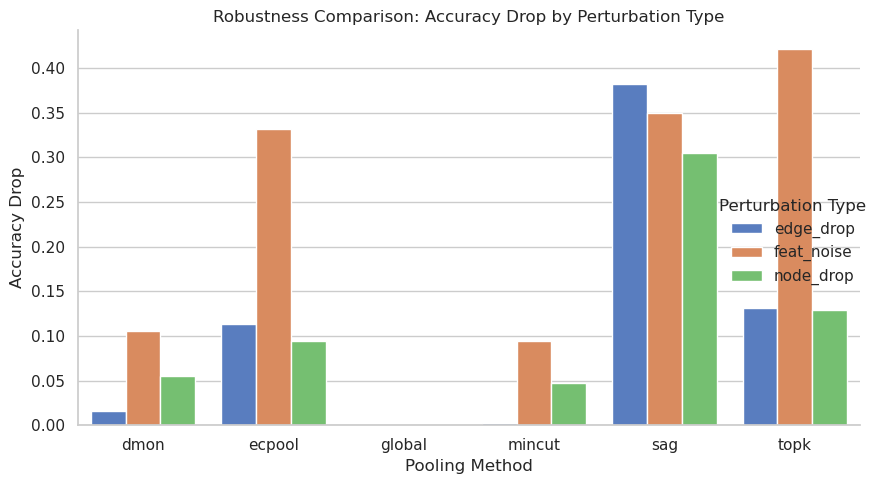

<Figure size 640x480 with 0 Axes>

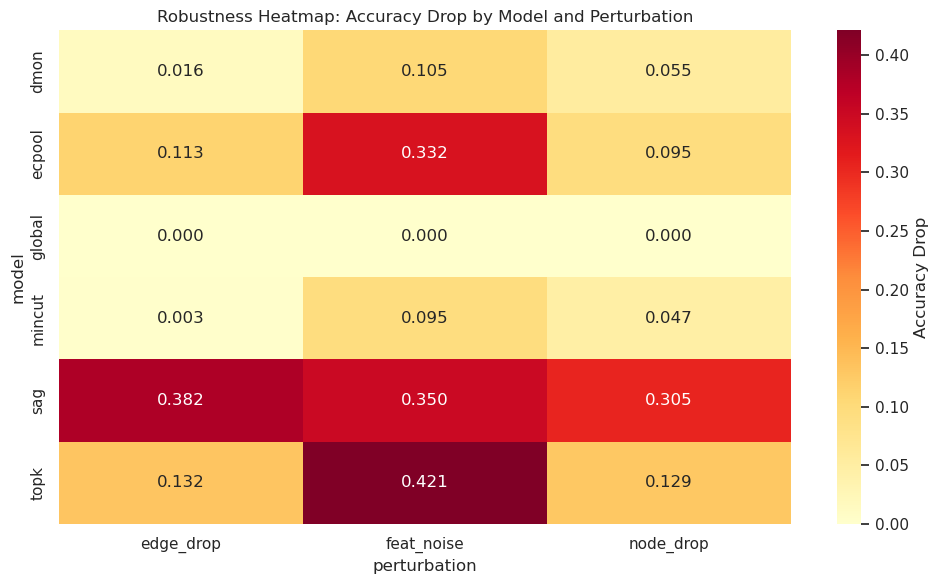

In [5]:
summary = df.groupby(['model', 'perturbation']).agg(
    baseline_acc=('mean_accuracy', lambda x: x.iloc[0]),
    worst_acc=('mean_accuracy', 'min')
)
summary['drop'] = summary['baseline_acc'] - summary['worst_acc']

# Reshape for plotting
summary_df = summary.reset_index()

# Create grouped bar chart
g = sns.catplot(
    data=summary_df,
    kind="bar",
    x="model", 
    y="drop", 
    hue="perturbation",
    palette="muted",
    height=5, 
    aspect=1.5
)

g.set_axis_labels("Pooling Method", "Accuracy Drop")
g.legend.set_title("Perturbation Type")
plt.title("Robustness Comparison: Accuracy Drop by Perturbation Type")
plt.tight_layout()

# Save or show the plot

plt.show()
    
plt.clf()

# Create heatmap of robustness drops
plt.figure(figsize=(10, 6))
pivot = pd.pivot_table(
    summary_df, 
    values='drop', 
    index='model', 
    columns='perturbation'
)

sns.heatmap(
    pivot, 
    annot=True, 
    fmt=".3f", 
    cmap="YlOrRd", 
    cbar_kws={'label': 'Accuracy Drop'}
)

plt.title("Robustness Heatmap: Accuracy Drop by Model and Perturbation")
plt.tight_layout()

# Save or show the plot

plt.show()